# Kernel Density Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will implement the Kernels in these format:

$\hat f(x) = \frac{1}{N} \sum_{i = 0}^N K((x - x_i)/h)$

Where we specefically implement Kernel as a one parameter function, as shown below.

In [2]:
class KDE:
    
    """
    >>>>>>>>>>>>>  Kernel Density Estimation  <<<<<<<<<<<<<<<<<
    
    Data should be uni dimensional numpy array of shape [n_data] for this to work.
    """
    
    def __init__(self, data, kernel = 'gaussian', bandwidth = 'infer'):
        
        if data.ndim != 1:
            raise ValueError("Data should be 1 dimensional numpy array")
        self.data = data
        self.kernel = kernel
        self.bandwidth = bandwidth
        self.result = None
        
    def GaussianKernel(self, x):
        """
        General Definition fro Kernels used:
        
        This Kernel and all subsequent ones take a 2D input, 
        operate the usual one parameter form on each input (along with the constants too)
        and return the sum along axis 1 of it.
        """
        
        result = np.sum((1/np.sqrt(2*np.pi)) * np.exp( -0.5 * np.power((x),2) ), axis = 1)
        return result
        
    
    
        
    def UniformKernel(self, x):
        """ Also called BOX KERNEL
        
        This works in a different way in the sense that it
        returns a 1D Vector of the final values directly, exploiting the innate 
        easiness of the Kernel.
        
        OTHER KERNELS ALSO WORKS IN THIS WAY
        """
        result = np.sum(0.5 * (np.abs(x) <= 1), axis = 1)
        return result
    
    def EpanechnikovKernel(self, x):
        
        result = np.sum((3/4) * ((1-np.power(x,2)) * (np.abs(x) <= 1)), axis = 1)
        return result
    
    def TriangularKernel(self, x):
        
        result = np.sum( ((1 - np.abs(x))*(np.abs(x) <= 1)) , axis = 1)
        return result
    
    def QuarticKernel(self, x):
        
        result = np.sum( (15/16)*np.power((1-np.power(x,2)),2)*(np.abs(x) <= 1) , axis = 1)
        return result
    
    def CosinusKernel(self, x):
        
        result = np.sum( (np.pi / 4)*np.cos((np.pi/2)*x)*(np.abs(x) <= 1) , axis = 1)
        return result
    
    def OptimalBandwidth(self, data):
        """
        Finds Optimal bandwidth by minimizing AMISE.
        """
        mean = np.mean(data)
        sigma_hat = np.sqrt(np.sum(np.power(data - mean,2)) / data.shape[0])
        
        optimal =  np.power((4/(3*data.shape[0])),0.2)*sigma_hat
    
        return optimal
        
    def CalcKernel(self, data, x, bandwidth, kernel):
        
        """
        data : shape [N], The points sampled from the unknown distribution p(x)
        x : shape [n], points on the X - axis (to plot the graph)
        bandwidth : the bandwidth.
        """
        
        if bandwidth == 'infer':
            self.bandwidth = self.OptimalBandwidth(data)
        
        u = (np.reshape(x,[-1,1])-data)/self.bandwidth
        N = data.shape[0]
        
        if kernel == 'gaussian':
            return (1/N)*(self.GaussianKernel(u))
            
        elif ((kernel == 'uniform') or (kernel == 'box')):
            return (1/N)*(self.UniformKernel(u))
    
        elif kernel == 'epanechnikov':
            return (1/N)*(self.EpanechnikovKernel(u))
            
        elif kernel == 'triangle':
            return (1/N)*(self.TriangularKernel(u))
        
        elif kernel == 'quartic':
            return (1/N)*(self.QuarticKernel(u))
        
        elif kernel == 'cosine':
            return (1/N)*(self.CosinusKernel(u))
        
        else:
            raise NotImplementedError("Kernel '{}' not implemented yet.".format(kernel))
            
        
            
    def plot(self, x_data ):
        """
        x : X - axis points for plotting.
        """
        
        y = self.CalcKernel(self.data, x_data, self.bandwidth, self.kernel)
        
        x_pts = np.zeros_like(self.data)
        
        plt.plot(x_data,y, 'b', label = 'KDE')
        plt.scatter(self.data, x_pts, marker = '+', c = 'r', label = 'Sample points')
        plt.legend()
        
        
    
    def getKDE(self, x_data):
        
        y = self.CalcKernel(self.data, x_data, self.bandwidth, self.kernel)
        
        return y

In [3]:
kde = KDE(np.array([1,4,3,7,6,4]), kernel='epanechnikov')

In [4]:
x = np.linspace(-2,10,10000)

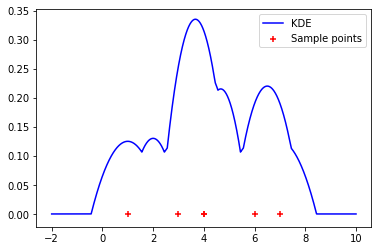

In [5]:
kde.plot(x)

In [6]:
kde.getKDE(x)

array([0., 0., 0., ..., 0., 0., 0.])